# BIA 656 
## Advance Data Analytics and Machine Learning
## Assignment : Lab 5
## Shrey Kshatriya

# Part 1

In [62]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd

#### Reading the data from the given csv file

In [63]:
df = pd.read_csv('credit-data-post-import.csv')
df.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### Splitting the data into training and testing by splitting into features and target

In [64]:
train, test = train_test_split(df, test_size=0.25)
train.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
54676,0,1.000000,58,0,0.542104,14000.0,9,0,2,0,2.0
53786,0,0.031125,70,0,61.000000,NaN,11,0,0,0,0.0
666,0,0.020704,47,0,0.645104,3400.0,6,0,1,0,2.0
76892,0,1.000000,28,0,0.193903,2000.0,2,0,0,1,0.0
56402,0,0.062678,33,0,0.009892,3335.0,3,0,0,0,0.0


#### Since only the y_train (monthly_income) has null values, we split the null values and nont null values

In [65]:
n = train[train['monthly_income'].isnull()]
n.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
53786,0,0.031125,70,0,61.0,NaN,11,0,0,0,0.0
68885,0,0.034433,66,0,1243.0,NaN,6,0,1,0,0.0
6236,0,0.000000,43,1,289.0,NaN,10,0,0,0,0.0
88594,0,0.016899,51,0,10.0,NaN,2,0,0,0,0.0
109734,0,0.674898,59,0,6239.0,NaN,12,0,2,0,1.0


In [66]:
nn = train[train['monthly_income'].notnull()]
nn.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
54676,0,1.000000,58,0,0.542104,14000.0,9,0,2,0,2.0
666,0,0.020704,47,0,0.645104,3400.0,6,0,1,0,2.0
76892,0,1.000000,28,0,0.193903,2000.0,2,0,0,1,0.0
56402,0,0.062678,33,0,0.009892,3335.0,3,0,0,0,0.0
102838,1,0.502096,68,0,0.387225,2770.0,10,0,1,0,0.0


#### We are using regression algorithms to fit and predict the missing values
#### Here we are using Lasso Regression to fir the model based on variables 'number_real_estate_loans_or_lines' and 'number_of_open_credit_lines_and_loans' as independent variables and 'monthly_income' as target/dependent variable

In [67]:
from sklearn import linear_model
X = nn[['number_real_estate_loans_or_lines', 'number_of_open_credit_lines_and_loans']]
y = nn['monthly_income']
clf = linear_model.Lasso(alpha=0.1)
reg_mod = clf.fit(X,y)
clf.fit(X,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [68]:
predictor = n.drop(['monthly_income'], axis=1)
predictor = predictor[['number_real_estate_loans_or_lines', 'number_of_open_credit_lines_and_loans']]
preds = reg_mod.predict(predictor)
preds

array([5537.74954645, 6261.57515389, 5413.3291646 , ..., 4293.54572799,
       6137.15477205, 4169.12534614])

#### Now that we have predicted values, we can impute these values in the null data

In [69]:
n['monthly_income'] = preds
n.head()

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
53786,0,0.031125,70,0,61.0,5537.749546,11,0,0,0,0.0
68885,0,0.034433,66,0,1243.0,6261.575154,6,0,1,0,0.0
6236,0,0.000000,43,1,289.0,5413.329165,10,0,0,0,0.0
88594,0,0.016899,51,0,10.0,4417.966110,2,0,0,0,0.0
109734,0,0.674898,59,0,6239.0,8354.024962,12,0,2,0,1.0


#### Now we combine the entire data i.e. the null and the predicted values

In [70]:
train_nn = nn.append(n)
train_nn.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
54676,0,1.000000,58,0,0.542104,14000.0,9,0,2,0,2.0
666,0,0.020704,47,0,0.645104,3400.0,6,0,1,0,2.0
76892,0,1.000000,28,0,0.193903,2000.0,2,0,0,1,0.0
56402,0,0.062678,33,0,0.009892,3335.0,3,0,0,0,0.0
102838,1,0.502096,68,0,0.387225,2770.0,10,0,1,0,0.0


#### We perform the same procedure for the test dataset
#### 1. Split null and not null
#### 2. Perform regression algorithms on not null values
#### 3. Predict the values
#### 4. Impute the data

#### Split into null and not null

In [71]:
nulls = test[test['monthly_income'].isnull()]
no_nulls = test[test['monthly_income'].notnull()]


#### Performing regression algorithm here is not necessary since the overall data is the same and the amount of data is small. However, we still perform regression algorithms here. (Lasso)

In [72]:
from sklearn import linear_model
a = no_nulls[['number_real_estate_loans_or_lines', 'number_of_open_credit_lines_and_loans']]
b = no_nulls['monthly_income']
cl = linear_model.Lasso(alpha=0.1)
reg = cl.fit(a,b)
cl.fit(a,b)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### Predicting the null values

In [73]:
to_predict = nulls.drop(['monthly_income'], axis=1)
to_predict = to_predict[['number_real_estate_loans_or_lines', 'number_of_open_credit_lines_and_loans']]
preds = reg_mod.predict(to_predict)
preds

array([6261.57515389, 7505.77897235, 4542.38649168, ..., 5288.90878275,
       4791.22725537, 5413.3291646 ])

#### Imputing predicted values in null dataset

In [74]:
nulls['monthly_income'] = preds

nulls.head()

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
6327,0,0.032711,45,0,1632.0,6261.575154,6,0,1,0,0.0
103843,0,0.055955,80,0,1242.0,7505.778972,16,0,1,0,0.0
96325,1,0.295409,35,1,433.0,4542.386492,3,0,0,0,0.0
95041,0,0.040095,59,0,113.0,4791.227255,5,0,0,0,0.0
1435,0,0.055607,65,0,2965.0,6137.154772,5,0,1,0,1.0


#### combining the not null with the null value dataset

In [75]:
test_nn = no_nulls.append(nulls)
test_nn.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
120277,0,0.291629,43,0,0.217078,10000.0,6,0,1,0,4.0
2064,0,0.000292,60,0,0.518684,2916.0,17,0,1,0,0.0
124416,0,0.195780,28,0,0.026150,2217.0,1,1,0,0,0.0
80786,0,0.344905,57,0,0.455856,5062.0,10,0,1,0,1.0
15379,0,0.033462,30,0,0.109856,7700.0,10,0,0,0,0.0


#### Now we save the datasets separetly as mentioned.

In [76]:
train_nn.to_csv(r'C:\Users\shrey\OneDrive\Documents\Stevens\SIT Sem 3\BIA 656\credit-data-trainingset.csv', index = False)
test_nn.to_csv(r'C:\Users\shrey\OneDrive\Documents\Stevens\SIT Sem 3\BIA 656\credit-data-testset.csv', index = False)

#### Comparing the original and imputed data for training and test dataset

In [80]:
train.isnull().sum()

serious_dlqin2yrs                                  0
revolving_utilization_of_unsecured_lines           0
age                                                0
number_of_time30-59_days_past_due_not_worse        0
debt_ratio                                         0
monthly_income                                 22292
number_of_open_credit_lines_and_loans              0
number_of_times90_days_late                        0
number_real_estate_loans_or_lines                  0
number_of_time60-89_days_past_due_not_worse        0
number_of_dependents                               0
dtype: int64

In [78]:
train_nn.isnull().sum()

serious_dlqin2yrs                              0
revolving_utilization_of_unsecured_lines       0
age                                            0
number_of_time30-59_days_past_due_not_worse    0
debt_ratio                                     0
monthly_income                                 0
number_of_open_credit_lines_and_loans          0
number_of_times90_days_late                    0
number_real_estate_loans_or_lines              0
number_of_time60-89_days_past_due_not_worse    0
number_of_dependents                           0
dtype: int64

In [81]:
test.isnull().sum()

serious_dlqin2yrs                                 0
revolving_utilization_of_unsecured_lines          0
age                                               0
number_of_time30-59_days_past_due_not_worse       0
debt_ratio                                        0
monthly_income                                 7439
number_of_open_credit_lines_and_loans             0
number_of_times90_days_late                       0
number_real_estate_loans_or_lines                 0
number_of_time60-89_days_past_due_not_worse       0
number_of_dependents                              0
dtype: int64

In [82]:
test_nn.isnull().sum()

serious_dlqin2yrs                              0
revolving_utilization_of_unsecured_lines       0
age                                            0
number_of_time30-59_days_past_due_not_worse    0
debt_ratio                                     0
monthly_income                                 0
number_of_open_credit_lines_and_loans          0
number_of_times90_days_late                    0
number_real_estate_loans_or_lines              0
number_of_time60-89_days_past_due_not_worse    0
number_of_dependents                           0
dtype: int64

# Part 2

#### Loading the training dataset that we created

In [83]:
dt = pd.read_csv('credit-data-trainingset.csv')
dt.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,0,1.000000,58,0,0.542104,14000.0,9,0,2,0,2.0
1,0,0.020704,47,0,0.645104,3400.0,6,0,1,0,2.0
2,0,1.000000,28,0,0.193903,2000.0,2,0,0,1,0.0
3,0,0.062678,33,0,0.009892,3335.0,3,0,0,0,0.0
4,1,0.502096,68,0,0.387225,2770.0,10,0,1,0,0.0


#### Loading the test dataset 

In [84]:
dm = pd.read_csv('credit-data-testset.csv')
dm.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,0,0.291629,43,0,0.217078,10000.0,6,0,1,0,4.0
1,0,0.000292,60,0,0.518684,2916.0,17,0,1,0,0.0
2,0,0.195780,28,0,0.026150,2217.0,1,1,0,0,0.0
3,0,0.344905,57,0,0.455856,5062.0,10,0,1,0,1.0
4,0,0.033462,30,0,0.109856,7700.0,10,0,0,0,0.0


#### Here we take the features as f and targets as t

In [85]:
f = dt[['revolving_utilization_of_unsecured_lines', 'age', 'number_of_time30-59_days_past_due_not_worse', 'debt_ratio', 'monthly_income', 'number_of_open_credit_lines_and_loans', 'number_of_times90_days_late', 'number_real_estate_loans_or_lines', 'number_of_time60-89_days_past_due_not_worse', 'number_of_dependents']]
t = dt['serious_dlqin2yrs']

#### Logistic regression (sklearn.linear_model.LogisticRegression) using penalty (regularization) L2

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

f_train = dt.drop(['serious_dlqin2yrs'], axis=1)
t_train = dt['serious_dlqin2yrs']
clf = LogisticRegression(penalty = 'l2').fit(f, t)

f_test = dm.drop(['serious_dlqin2yrs'], axis=1)
t_test = dm['serious_dlqin2yrs']
lr_pred = clf.predict(f_test)


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Performing cross-validation to check the score/accuracy of the algorithm

In [87]:
log_scores = cross_val_score(clf, f_train, t_train, scoring="accuracy", cv=10)

print('Cross-Validation Accuracy Scores', log_scores)

log_scores = pd.Series(log_scores)
np_log = log_scores.mean()
log_scores.min(), log_scores.mean(), log_scores.max()

print ("Cross Validated Accuracy: %0.3f +/- %0.3f" % (log_scores.mean(), log_scores.std()))

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Cross-Validation Accuracy Scores [0.93369478 0.93387254 0.93351702 0.93502222 0.9344     0.93404444
 0.93502222 0.93368299 0.93528314 0.93474976]
Cross Validated Accuracy: 0.934 +/- 0.001


#### Any version of decision trees

In [88]:
from sklearn.tree import DecisionTreeClassifier
dx = DecisionTreeClassifier()
dt_fit = dx.fit(f_train, t_train)

t_dt_pred = dx.predict(f_test)

In [89]:
dt_scores = cross_val_score(dt_fit, f_train, t_train, scoring="accuracy", cv=10)

print('Cross-Validation Accuracy Scores', dt_scores)

dt_scores = pd.Series(dt_scores)
dt_scores.min(), dt_scores.mean(), dt_scores.max()

print ("Cross Validated Accuracy: %0.3f +/- %0.3f" % (dt_scores.mean(), dt_scores.std()))

Cross-Validation Accuracy Scores [0.89609812 0.90036441 0.89289841 0.89324444 0.89884444 0.89306667
 0.89502222 0.8947462  0.90879189 0.91101431]
Cross Validated Accuracy: 0.898 +/- 0.007


#### SVM using penalty (regularization) L2 

In [94]:
from sklearn.svm import LinearSVC

svm_fit = LinearSVC(penalty='l2')
svm_mod = svm_fit.fit(f_train, t_train)

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [95]:
svm_scores = cross_val_score(svm_mod, f_train, t_train, scoring="accuracy", cv=5)

print('Cross-Validation Accuracy Scores', svm_scores)

svm_scores = pd.Series(svm_scores)
svm_scores.min(), svm_scores.mean(), svm_scores.max()

print ("Cross Validated Accuracy: %0.3f +/- %0.3f" % (svm_scores.mean(), svm_scores.std()))

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Cross-Validation Accuracy Scores [0.86858362 0.93378072 0.93413333 0.93484155 0.92661896]
Cross Validated Accuracy: 0.920 +/- 0.029


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### Adaboost

In [96]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier()
adab_fit = clf_ada.fit(f_train, t_train)

In [97]:
adab_scores = cross_val_score(adab_fit, f_train, t_train, scoring="accuracy", cv=5)
print('Cross-Validation Accuracy Scores', adab_scores)
adab_scores = pd.Series(adab_scores)
adab_scores.min(), adab_scores.mean(), adab_scores.max()

print ("Cross Validated Accuracy: %0.3f +/- %0.3f" % (adab_scores.mean(), adab_scores.std()))

Cross-Validation Accuracy Scores [0.9356473  0.93609173 0.93484444 0.93639717 0.93901951]
Cross Validated Accuracy: 0.936 +/- 0.002


## ROC Curves

#### ROC curve for logistic regression

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

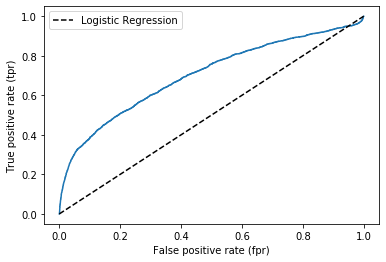

In [34]:
# Get the probability of Y_test records being = 1
from sklearn import metrics
import numpy as np
t_test_probability_1 = clf.predict_proba(f_test)[:, 1]

    # Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
fpr, tpr, thresholds = metrics.roc_curve(t_test, t_test_probability_1)
    
    # Get the area under the curve (AUC)
auc = np.mean(cross_val_score(clf, f_train, t_train, scoring="roc_auc", cv=5))

    # Plot the ROC curve

plt.plot(fpr, tpr)
    
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Logistic Regression")
plt.legend(loc='best')

#### Cumulative Curve for Logistic Regression

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


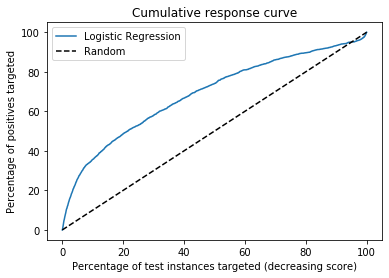

In [36]:
def build_cumulative_curve(model, scale=100):
     # Fit model
    model.fit(f_train, t_train)

    # Get the probability of Y_test records being = 1
    Y_test_probability_1 = model.predict_proba(f_test)[:, 1]

    # Sort these probabilities and the true value in descending order of probability
    order = np.argsort(Y_test_probability_1)[::-1]
    Y_test_probability_1_sorted = Y_test_probability_1[order]
    Y_test_sorted = np.array(t_test)[order]
    
    x_cumulative = np.arange(len(Y_test_probability_1_sorted)) + 1
    y_cumulative = np.cumsum(Y_test_sorted)

# Rescale
    x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * scale
    y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * scale
    
    return x_cumulative, y_cumulative

def plot_cumulative_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [0,100], 'k--', label="Random")
    plt.xlabel("Percentage of test instances targeted (decreasing score)")
    plt.ylabel("Percentage of positives targeted")
    plt.title("Cumulative response curve")
    plt.legend()

models = {"Logistic Regression": LogisticRegression()}
plot_cumulative_curve(models)

#### Lift Curve for Logistic Regression

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


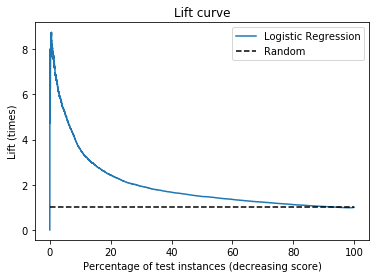

In [37]:
def plot_lift_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative/x_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [1,1], 'k--', label="Random")
    plt.xlabel("Percentage of test instances (decreasing score)")
    plt.ylabel("Lift (times)")
    plt.title("Lift curve")
    plt.legend()

plot_lift_curve(models)

#### ROC curve for D Tree

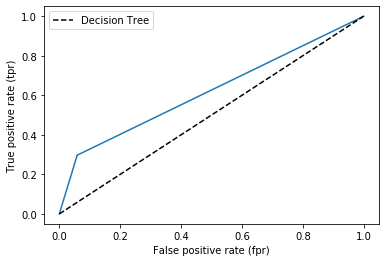

In [38]:
# Get the probability of Y_test records being = 1
from sklearn import metrics
import numpy as np
y_test_probability_1 = dt_fit.predict_proba(f_test)[:, 1]

    # Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
fpr, tpr, thresholds = metrics.roc_curve(t_test, y_test_probability_1)
    
    # Get the area under the curve (AUC)
auc = np.mean(cross_val_score(dt_fit, f_train, t_train, scoring="roc_auc", cv=5))

    # Plot the ROC curve

plt.plot(fpr, tpr)
    
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Decision Tree")
plt.legend(loc='best')

#### Cumulative curve for D tree

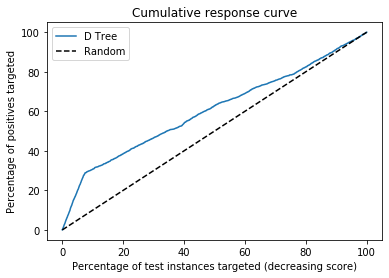

In [39]:
def build_cumulative_curve(model, scale=100):
     # Fit model
    model.fit(f_train, t_train)

    # Get the probability of Y_test records being = 1
    Y_test_probability_1 = model.predict_proba(f_test)[:, 1]

    # Sort these probabilities and the true value in descending order of probability
    order = np.argsort(Y_test_probability_1)[::-1]
    Y_test_probability_1_sorted = Y_test_probability_1[order]
    Y_test_sorted = np.array(t_test)[order]
    
    x_cumulative = np.arange(len(Y_test_probability_1_sorted)) + 1
    y_cumulative = np.cumsum(Y_test_sorted)

# Rescale
    x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * scale
    y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * scale
    
    return x_cumulative, y_cumulative

def plot_cumulative_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [0,100], 'k--', label="Random")
    plt.xlabel("Percentage of test instances targeted (decreasing score)")
    plt.ylabel("Percentage of positives targeted")
    plt.title("Cumulative response curve")
    plt.legend()

models = {"D Tree": DecisionTreeClassifier()}
plot_cumulative_curve(models)

#### Lift Curve for D Tree

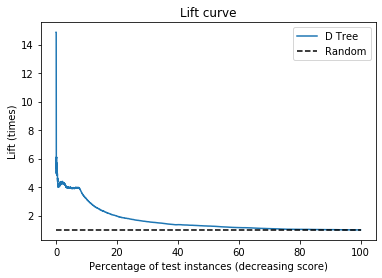

In [40]:
def plot_lift_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative/x_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [1,1], 'k--', label="Random")
    plt.xlabel("Percentage of test instances (decreasing score)")
    plt.ylabel("Lift (times)")
    plt.title("Lift curve")
    plt.legend()

plot_lift_curve(models)

### ROC curve for Ada Boost

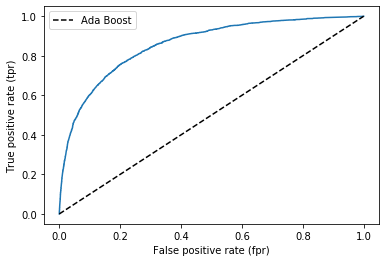

In [41]:
# Get the probability of Y_test records being = 1
from sklearn import metrics
import numpy as np
y_test_probability_1 = adab_fit.predict_proba(f_test)[:, 1]

    # Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
fpr, tpr, thresholds = metrics.roc_curve(t_test, y_test_probability_1)
    
    # Get the area under the curve (AUC)
auc = np.mean(cross_val_score(adab_fit, f_train, t_train, scoring="roc_auc", cv=5))

    # Plot the ROC curve

plt.plot(fpr, tpr)
    
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Ada Boost")
plt.legend(loc='best')

### Cumulative Curve for Ada Boost

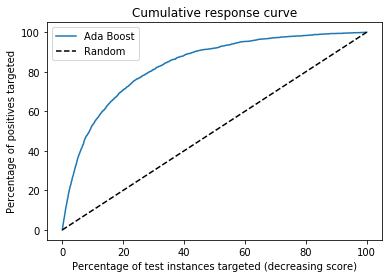

In [42]:
def build_cumulative_curve(model, scale=100):
     # Fit model
    model.fit(f_train, t_train)

    # Get the probability of Y_test records being = 1
    Y_test_probability_1 = model.predict_proba(f_test)[:, 1]

    # Sort these probabilities and the true value in descending order of probability
    order = np.argsort(Y_test_probability_1)[::-1]
    Y_test_probability_1_sorted = Y_test_probability_1[order]
    Y_test_sorted = np.array(t_test)[order]
    
    x_cumulative = np.arange(len(Y_test_probability_1_sorted)) + 1
    y_cumulative = np.cumsum(Y_test_sorted)

# Rescale
    x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * scale
    y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * scale
    
    return x_cumulative, y_cumulative

def plot_cumulative_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [0,100], 'k--', label="Random")
    plt.xlabel("Percentage of test instances targeted (decreasing score)")
    plt.ylabel("Percentage of positives targeted")
    plt.title("Cumulative response curve")
    plt.legend()

models = {"Ada Boost": AdaBoostClassifier()}
plot_cumulative_curve(models)

### Lift Curve for Ada Boost

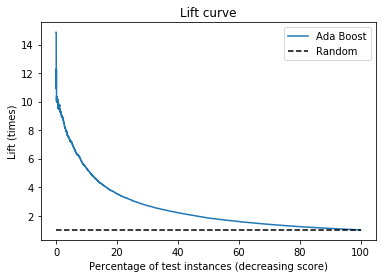

In [43]:
def plot_lift_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative/x_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [1,1], 'k--', label="Random")
    plt.xlabel("Percentage of test instances (decreasing score)")
    plt.ylabel("Lift (times)")
    plt.title("Lift curve")
    plt.legend()

plot_lift_curve(models)

### ROC Curves for SVM Classifier

#### Since LinearSVM does not have predict_proba() function, and SVM function is very time consuming, we utilize CalibratedClassifierCV which allows the use of predict_proba() function. 


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


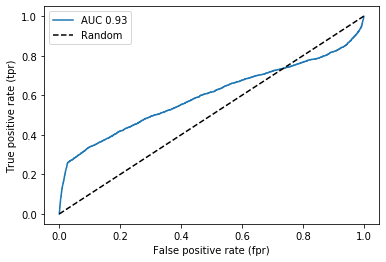

In [45]:
from sklearn.calibration import CalibratedClassifierCV

clf_svm = CalibratedClassifierCV(svm_mod) 
clf_svm = clf_svm.fit(f_train, t_train)
# Get the probability of Y_test records being = 1
Y_test_probability_1 = clf_svm.predict_proba(f_test)[:, 1]

# Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
fpr, tpr, thresholds = metrics.roc_curve(t_test, Y_test_probability_1)
    
# Get the area under the curve (AUC)
auc = svm_scores.mean()

# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC " + str(round(auc, 2)))
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc='best')

### Cumulative Curve for SVM

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


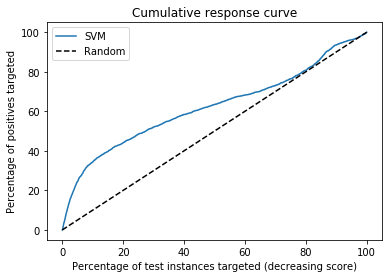

In [48]:
def build_cumulative_curve(model, scale=100):
     # Fit model
    model.fit(f_train, t_train)

    # Get the probability of Y_test records being = 1
    Y_test_probability_1 = model.predict_proba(f_test)[:, 1]

    # Sort these probabilities and the true value in descending order of probability
    order = np.argsort(Y_test_probability_1)[::-1]
    Y_test_probability_1_sorted = Y_test_probability_1[order]
    Y_test_sorted = np.array(t_test)[order]
    
    x_cumulative = np.arange(len(Y_test_probability_1_sorted)) + 1
    y_cumulative = np.cumsum(Y_test_sorted)

# Rescale
    x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * scale
    y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * scale
    
    return x_cumulative, y_cumulative

def plot_cumulative_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [0,100], 'k--', label="Random")
    plt.xlabel("Percentage of test instances targeted (decreasing score)")
    plt.ylabel("Percentage of positives targeted")
    plt.title("Cumulative response curve")
    plt.legend()

models = {"SVM": CalibratedClassifierCV()}
plot_cumulative_curve(models)

### Lift Curve for SVM

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


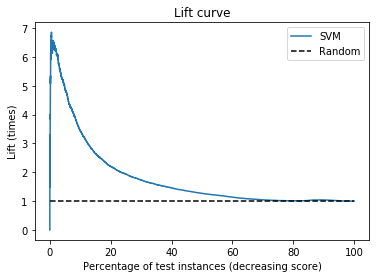

In [49]:
def plot_lift_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative/x_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [1,1], 'k--', label="Random")
    plt.xlabel("Percentage of test instances (decreasing score)")
    plt.ylabel("Lift (times)")
    plt.title("Lift curve")
    plt.legend()

plot_lift_curve(models)

## Grid Search

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

p ={'base_estimator__max_depth':[1,100],
    'base_estimator':[DecisionTreeClassifier(max_features=2),
                      DecisionTreeClassifier(max_features= 10)]}
gridS=GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),p)

#To provide the data and to fit the model
gridS.fit(f_train, t_train)
print(gridS.best_estimator_)

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=10,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

### Now since our best model was AdaBoost, we train and test the model using the training dataset and test dataset respectively

### Training AdaBoost Model on the train dataset we saved earlier

In [58]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=2,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                                                         splitter='best'),
                   learning_rate=1.0, n_estimators=50, random_state=None)
adab_fit = clf_ada.fit(f_train, t_train)

In [59]:
adab_scores = cross_val_score(adab_fit, f_train, t_train, scoring="accuracy", cv=10)

print('Cross-Validation Accuracy Scores', adab_scores)

adab_scores = pd.Series(adab_scores)
adab_scores.min(), adab_scores.mean(), adab_scores.max()

print ("Cross Validated Accuracy: %0.3f +/- %0.3f" % (adab_scores.mean(), adab_scores.std()))

Cross-Validation Accuracy Scores [0.93618345 0.93627233 0.93440583 0.93627233 0.93511111 0.93724444
 0.93510534 0.93332741 0.93590541 0.93786114]
Cross Validated Accuracy: 0.936 +/- 0.001


### Testing the data with the best parameters

In [61]:
from sklearn.metrics import accuracy_score
#predicting with test data
t_pred = adab_fit.predict(f_test)
t_test = dm['serious_dlqin2yrs']

#accuracy score 
print (" Accuracy(in %) : " , accuracy_score(t_test, t_pred)*100)

 Accuracy(in %) :  93.624
